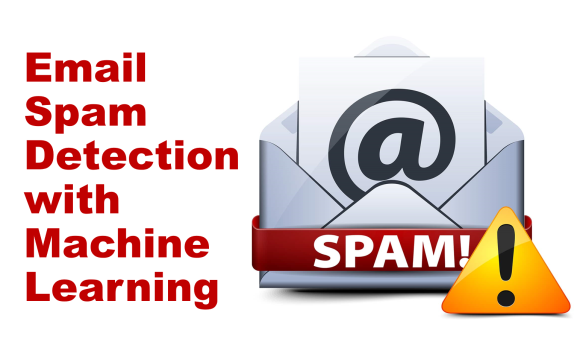

#Importing the Necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#load dataset into pandas data frame

In [4]:
df= pd.read_csv('spam.csv',encoding='latin-1')

#display the first 5 rows

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Drop the columns with NaN values

In [8]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Rename columns for clarity:

In [11]:
df.columns = ['label', 'text']

# Displaying the first 5 rows to get basic understanding of the data

In [12]:
print(df.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [14]:
# Separate features (X) and target labels (y)
X =  df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the Classifier (Multinomial Naive Bayes)


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

     

# Create a CountVectorizer instance

In [16]:
vectorizer = CountVectorizer()

In [17]:
# Fit and transform the training data (X_train)
X_train_vectorized = vectorizer.fit_transform(X_train['text'])

# Transform the test data (X_test)
X_test_vectorized = vectorizer.transform(X_test['text'])

In [18]:
# Train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [19]:
# Make predictions on the test data
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.98
Confusion Matrix:
[[963   2]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



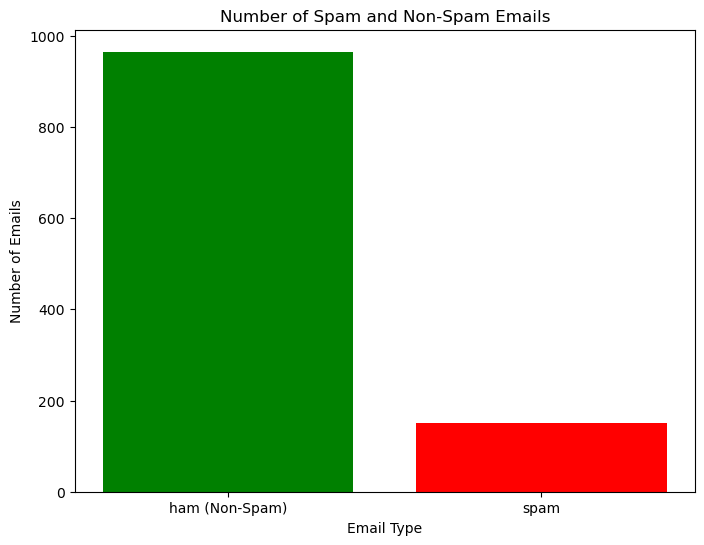

In [20]:
import matplotlib.pyplot as plt

# Count the number of spam and non-spam emails in the test set
spam_counts = y_test.value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(spam_counts.index, spam_counts.values, color=['green', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Number of Spam and Non-Spam Emails')
plt.xticks([0, 1], ['ham (Non-Spam)', 'spam'])
plt.show()